# Programming Exercise 8: Anomaly Detection and Recommender Systems

```
by Seokkyu Kong
Date: 2016-04-17
Summary: Coursera 코세라 machine learning 기계학습 강의 연습문제 8번을 Octave에서 Python으로 code migration 한다.
```

## Introduction

이번 연습문제에서는, __anomaly detection algorithm 이상치 검출 알고리즘을 구현하고__ 네트워크 상에서 오동작 하는 서버들을 검출하기 위해 적용해볼 것이다. 2번째 부분에서, __영화 추천 시스템을 구축하기 위해 collaborative filtering 협업 필터링을__ 사용하게 된다.

연습문제 첫번째 부분 (이상치 검출)을 통해서 스크립트 ex8.m을 사용하게 된다. 협업 필터링 2번째 부분에서는 ex8_cofi.m을 사용하게 된다. 이들 스크립트는 문제를 위한 데이터셋을 준비하고 당신이 작성한 함수들을 호출한다. 과제 내의 지시를 따르면서, 다른 파일에 있는 함수들만 수정해야 한다. 

## 1. Anomaly detection

연습문제에서, 이상치 검출 알고리즘을 작성하고 서버 컴퓨터에 비정상 행위를 검출한다. 이들 feature는 각각 서버의 throughput (mb/s)와 latency (ms) 를 측정한다. 서버가 동작중일때, 서버가 어떻게 행동하는지에 대한 m = 307 examples를 수집한다. 그리고 이것은 라벨이 없는 데이터셋 $ \{x^{(1)},,,x^{(m)} \} $ 이 된다. 당신은 이들 examples의 대다수가 "normal" (non-anomalous) 정상적으로 동작하는 서버의 exmaples이고, 데이터셋 내에 비정상적으로 행동하는 서버의 몇몇 예제들이 있을 수 있다고 의심한다.

__가우시안 모델을 이용해서 데이터셋 내의 비정상 examples를 검출하게 될 것이다.__ 먼저 2D 데이터셋에서 시작하는데 그것은 알고리즘이 하는 것을 가시화하게끔 만들어 준다. __그 데이터넷 상에서, 가우시안 분포를 fit하게 되고 장애로 생각될 수 있는 매우 낮은 확률을 가진 값을 찾는다. 그리고 난다음, 많은 차원을 가진 더 큰 데이터셋에 이상치 검출 알고리즘을 적용한다.__

ex8.m의 첫 부분에서 그림 1에 보여진 것과 같이 데이터셋을 가시화한다.



In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


Visualizing example dataset for outlier detection.


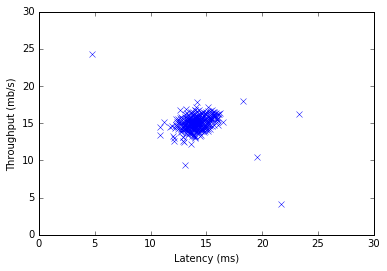

In [2]:
# Exercise 8 | Anomaly Detection and Collaborative Filtering

## ================== Part 1: Load Example Dataset  ===================
# 우리는 가시화 하기 쉬운 작은 데이터셋을 사용해서 연습문제를 시작한다.
# 우리의 example case는 여러 머신에 걸쳐서 2개의 네트워크 서버 통계치로
# 구성되어 있다. 각 머신에 대한 latency와 throughput 이다.
# 이 연습문제는 장애가 생길 수 있는 (또는 가장 빠른) 머신을 찾는데
# 도움을 준다.

print('Visualizing example dataset for outlier detection.')

# 다음 명령어는 데이터셋을 로드한다. 변수 X, Xval, yval을 갖게 된다.
mat_content = sio.loadmat('ex8data1.mat')
X = mat_content['X']
Xval = mat_content['Xval']
yval = mat_content['yval']
yval = yval.ravel()

# example dataset을 가시화한다.
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

### 1.1 Gaussian distribution

__이상치 검출을 수행하기 위해서, 데이터의 분포에 모델을 fit 적합시킬 필요가 있다.__

__주어진 training set {x(1),,, x(m)} ( $ x^{(i)} \in \mathbb{R}^{n} $ ), 에서 x(i)에 대한 각각의 feature에 대한 가우시안 분포를 측정하고 싶어할 것이다.__ 각각의 feature i = 1,,,n 에 대해서 파라미터 $ \mu _{i} $ , $ \sigma _{i}^2 $을 찾을 필요가 있고 그것은 i번째 차원의 데이터 $ \{ x_{i} ^{(1)}, ,,, x_{i} ^{(m)} \} $ 에 fit 하게 된다. (각 example에서의 i번째 차원)

가우시안 분포는 다음과 같이 주어진다.

여기서 $ \mu $ 는 평균이고 $ \sigma^2 $ 은 분산을 제어한다.





### 1.2 Estimating parameters for a Gaussian

i-번째 feature에 대한 파라미터 $ ( \mu_{i}, \sigma^{2} ) $ 를 평가할 수 있는데 다음 방정식을 사용한다. 평균을 계산하기 위해서 아래처럼 사용한다.

(1)

그리고 분산에 대해서는 아래처럼 사용한다.

(2)

당신의 작업은 __estimateGaussian.m__ 내의 코드를 완성하는 것이다. 이 함수는 데이터 행렬 X를 입력으로 가지며 n 차원이 벡터 mu를 출력하는데 모든 n개 feature에 대한 평균을 담고 있다. 그리고 다른 n차원의 벡터 simga2를 출력하는데 모든 features에 대한 분산을 가지고 있다. 

이것을 각 feature와 각 example에 대해서 for-loop를 사용할 수 있다 (비록 벡터화 구현이 더욱 효율적이고, 만약 좋아한다면 벡터화 구현을 사용해보아라). __Octave/MATLAB에서 var 함수는 $ \sigma^{2} $을 계산할 때, 1/m 대신에 (기본적으로) 1/(m-1)을 사용한다.__

일단 estimateGaussian.m의 코드를 완성한 이후, ex8.m의 다음 부분은 fitted 가우시안 분포의 contours를 가시화 할 것이다. 당신은 그림 2와 유사한 plot을 얻어야 한다. 당신의 plot에서, 대부분의 examples가 가장 높은 확률을 가진 영역에 있음을 볼 수 있다. 반면 anomalous exampes 비정상 예제들은 낮은 확률을 가진 영역에 있다.

Figure 2: The Gaussian distribution contours of the distribution fit to the dataset

Visualizing Gaussian fit.
[ 14.11222578  14.99771051] [ 1.83263141  1.70974533]
[ 0.06470829  0.05030417  0.07245035  0.05031575  0.06368497]



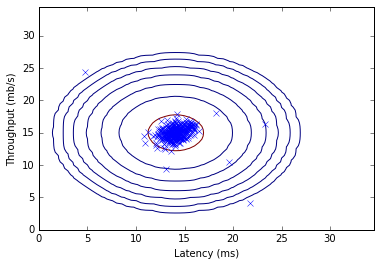

In [3]:
# You should now submit your solutions.

def estimateGaussian(X):
    """
    이 함수는 X내의 데이터를 이용해서 가우시안 분포의 파라미터를 추정한다.
    입력 X는 각각 n-차원의 데이터 포인트를 하나의 행으로 가진 데이터셋이다.
    출력값은 n-차원의 벡터 mu 인데 그것은 데이터셋의 평균값이고 분산 sigma^2은 
    n x 1 벡터이다.
    """
    
    # 유용한 변수들
    m, n = X.shape
    
    # 이들 값들을 올바르게 반환해야 한다.
    mu = np.zeros(n)
    sigma2 = np.zeros(n)
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 데이터의 평균과 분산을 계산한다. 특히, mu(i)는 i-번째 
    # feature에 대한 평균값이어야 하고 sigma2(i)는 i-번째 feature에 대한
    # 분산값을 가져야 한다.
    
    # 컬럼 벡터 기준으로 평균을 계산한다.
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    
    return mu, sigma2

def multivariateGaussian(X, mu, Sigma2):
    """
    다변수 가우시안 분포의 확률 밀도 함수를 계산한다.
    파라미터 mu와 Sigma2를 가진 다변수 가우시안 분포 아래에서 
    examples X의 확률 밀도 함수를 계산한다. 만약 Sigma2가 행렬이라면,
    공분산 행렬로 다루어져야 한다. 만약 Sigma2가 벡터라면, 각 차원에서
    \sgima^2 인 분산의 값으로 다루어져야 한다. (대각 공분산 행렬)
    """
    
    k = mu.shape[0]
    
    # Sigma2: 2 x 2
    if(Sigma2.ndim == 1):
        Sigma2 = diag(Sigma2)
                
    # ********************************************************************
    # XXX: X = bsxfun(@minus, X, mu(:)'); 의 표현은 X = X - mu로 가능하다.
    # XXX: bsxfun(@times, A, B) <=> A * B
    # ********************************************************************
    X = X - mu
    # det(Sigma2): 3.1333
    # pinv(Sigma2): [[0.54566, 0], [0, 0.58488]]
    p = (2 * pi)**(-k / 2) * linalg.det(Sigma2)**(-0.5) \
        * np.exp(-0.5 * sum(X.dot(linalg.pinv(Sigma2)) * X, axis=1))
    
    return p

def visualizeFit(X, mu, sigma2):
    """
    데이터셋과 추정된 분포를 가시화한다.
    이것은 가우시안 분포의 확률밀도 함수를 보여준다. 각 example은
    위치 (x2, x2)를 가지고 있는데 feature 값에 의존한다.
    """
    
    # X1: 70x70, X2: 70x70
    X1, X2 = meshgrid(np.arange(0, 35, .5), np.arange(0, 35, .5))
    

    # Z: 4900x1
    Z = multivariateGaussian(np.column_stack((X1.ravel(), X2.ravel())), mu, sigma2)
    # Z: 70x70
    Z = reshape(Z, X1.shape)
    

    # X[:, 0]: 307x1
    plot(X[:, 0], X[:, 1], 'bx')
    
    # XXX: 10 ** np.arange(-20, 0, 3)은 컨투어 그래프가 표시되지 않는다.
    # 무한이 존재하면 plot하지 않는다.
    if(sum(isinf(Z)) == 0):
        plt.contour(X1, X2, Z, 10.0 ** np.arange(-20, 0, 3))
        

## ================== Part 2: Estimate the dataset statistics ===================
# 이 연습문제에 대해서, 데이터셋에 대한 가우시안 분포를 가정한다.
# 
# 우리는 먼저 우리가 가정한 가우시안 분포의 파라미터를 추정한다. 
# 그리고나서 각 포인트에 대한 확률을 계산한다. 그리고 전체 분포와 그 분포 관점에서
# 각 포인트가 떨어지는 지점을 가시화 한다.

print('Visualizing Gaussian fit.')

# mu와 sigma2를 추정한다.
mu, sigma2 = estimateGaussian(X)
print(mu, sigma2)

# 각 데이터 포인트에서 (행으로) multivariate normal 의 density를 반환한다.
p = multivariateGaussian(X, mu, sigma2)

print(p[:5])

# fit을 가시화한다.
visualizeFit(X, mu, sigma2)

plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

"""
In Octave/MATLAB: 

mu =

   14.112   14.998

sigma2 =

   1.8326   1.7097

p =

   6.4708e-02
   5.0304e-02
   7.2450e-02
   5.0316e-02
"""
print()

### 1.3 Selecting the threshold, $ \varepsilon $

이제 당신은 가우시안 파라미터를 평가했다. 당신은 어떤 examples가 매우 높은 확률을 갖는지 주어진 분포에서 조사할 수 있고 어떤 examples가 매우 낮은 확률을 갖는지 알 수 있다. **낮은 확률의 examples는 우리의 데이터셋에서 더욱 비정상일 가능성이 있다.** **어떤 examples가 비정상인지 결정하는 한 가지 방법은 cross validation 을 기초로 threshold를 선택하는 것이다.** 

연습문제의 이 부분에서는, **알고리즘을 구현해서 threshold $ \varepsilon $ 을 선택하는데 cross validation 상에서 F1 score를 사용한다.**

당신은 이제 selectThreshold.m 내의 코드를 완성해야 한다. 이것을 위해서, 우리는 cross validation set {(Xcv^(1), ycv^(1)),,,,(xcv^(mcv), ycv^(mcv))}, 를 사용한다. 여기서 label y = 1은 비정상 example과 일치한다. y = 0은 정상 example이다. 각각의 cross validtion example에 대해서, 우리는 p(xcv^(i))를 계산한다. 이들 확률에 대한 모든 벡터 p(xcv^(1)),,,p(xcv^(mcv))는 pval 벡터로 selectThreshold.m에 전달된다. 일치하는 라벨 ycv^(1),,,ycv^(mcv) 는 동일한 함수에 yval 벡터로 전달된다.

함수 selectThreshold.m은 2개의 값을 반환해야 하는데, 첫번째는 선택된 threshold $ \varepsilon $ 이다. **만약 하나의 example x가 낮은 확률 p(x) < $ \varepsilon $ 이라면, 그것은 비정상으로 생각될 수 있다.** 함수는 또한 ** $ F_1 $ score를 반환해야 하는데, 그것은 주어진 어떤 threshold 상에서 정말 비정상을 얼마나 잘 발견할 지에 대해서 이야기 해준다.**

서로 다른 많은 $ \varepsilon $ 에 대해서, 당신은 F1 score를 계산하는데, 현재의 threshold 가 얼마나 많은 examples를 정상과 비정상으로 분류하는지 계산한다.

F1 score는 precision (prec)과 recall (rec) 을 사용해서 계산된다.

F1 = (2 * prec * rec) / (prec + rec) .... (3)

precision과 recall은 다음처럼 계산한다:

prec = tp / (tp + fp) .... (4)

rec = tp / (tp + fn) .... (5)

여기서
- tp 는 true positives의 갯수이다: ground truth label이 비정상이고 우리의 알고리즘도 그것을 비정상으로 분류했다.
- fp 는 false positives 갯수이다:ground truth label이 anomaly가 아니라고 말하지만, 우리의 알고리즘은 anomaly로 올바르지 않게 분류했다.
- fn 은 false negatives의 개수이다: ground truth label은 anomaly라고 말하지만, 우리의 알고리즘은 anomaly가 아니라고 올바르지 않게 분류했다.

제공된 코드 selectThreshold.m에서, 서로 다른 e 값을 시도해보고 F1 score 기준으로 가장 좋은 e를 선택하는 loop가 이미 있다. 당신은 모든 cross validation examples에 대해서 for-llp를 사용해 F1 score를 계산하는 부분을 구현할 수 있다. (tp, fp, fn 의 값을 계산한다.). epsilon이 약 8.99e-05 정도임을 보아야 한다.

Implementation Note: tp, fp 그리고 fn을 계산하기 위해서, 모든 examples에 대해 loop 보다는 벡터화된 구현을 사용할 수 있을 것이다. 이것은 Octave/MATLAB의 벡터와 숫자 사이의 동일성 테스트를 통해 구현될 수 있다. 만약 몇몇 이진값이 n-차원 binary 벡터로 v \in {0, 1}^n 이라면, 이 벡터 안에 얼마나 많은 0이 있는지는 **sum(v == 0)**을 사용해서 알 수 있다.
또한 논리 연산자 and 를 그와 같은 binary vector에 적용할 수 있다. 예를 들어, cvPredictions 가 cross validation set의 크기로 된 binary vector라고 하자. 여기서 i-번째 요소가 1이고 알고리즘이 xcv^(i)를 anomaly로 보고 0은 그렇지 않다고 하자. 그러면, 예를 들어, false positives 숫자 계산은 **fp = sum((cvPredictions == 1) & (yval == 0))**을 사용해서 가능한다.

Figure 3: The classified anomailes.

일단 selectThreshold.m 의 코드를 완성하면, ex8.m의 다음 단계는 당신의 anomaly 검출 코드를 실행시켜서 plot 내의 anomalies에 원을 그릴 것이다. (그림 3).


Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)


C:\Users\skkong\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


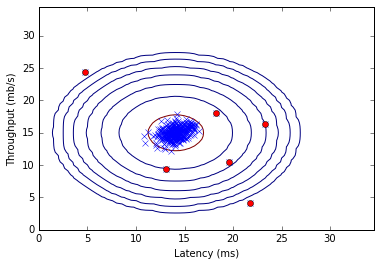

In [4]:
# You should now submit your solutions.

## ================== Part 3: Find Outliers ===================
# 이제 좋은 epsilon threshold를 찾는데, 주어진 추정된 가우시안 분포에서
# cross-validation set상의 확률을 이용한다.

def selectThreshold(yval, pval):
    """
    outliers를 선택하기 위해 사용될 최적의 threshold (epsilon)을 찾는다.
    outliers를 선택하기 위해 사용되는 최적의 threshold를 찾는데
    하나의 validation set (pval)과 ground truth (yval)로부터의
    결과에 근거한다.
    """
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    # 가장 낮은 확률에서 높은 확률값까지 1000 단계로 구분한다.
    stepsize = (max(pval) - min(pval)) / 1000;
    
    for epsilon in np.arange(min(pval), max(pval), stepsize):
        # ====================== YOUR CODE HERE ======================
        # threshold로써 epsilon을 선택하는 F1 score를 계산한다.
        # loop의 끝에 있는 코드는 F1 score를 선택된 epsilon하고 비교하고
        # 만약 현재 선택된 epsilon보다 더 좋다면 그것이 더 좋은 epsilon이
        # 되도록 설정한다.
        # Note: predictions = (pval < epsilon) 을 사용해서 outlier를 예측인
        # 0과 1로된 binary 벡터를 구할 수 있다.
        
        # epsilon보다 작은 것은 anomaly로 구분해서 벡터로 저장한다.
        predictions = (pval < epsilon)
        
        # true positives 계산: 실제 anomaly이고 anomaly로 예측함
        tp = sum((predictions == 1) & (yval == 1))
        
        # false positives 계산: 실제 anomaly가 아닌데, anomaly로 예측함
        fp = sum((predictions == 1) & (yval == 0))
        
        # false negatives 계산: 실제 anomaly인데 anomaly가 아님으로 예측함
        fn = sum((predictions == 0) & (yval == 1))
                
        # 정확도 계산
        prec = tp / (tp + fp)
        
        # 재현율 계산
        rec = tp / (tp + fn)
                
        
        # F1 score 계산
        F1 = 2 * prec * rec / (prec + rec)
                
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
            
    return bestEpsilon, bestF1

pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set:  %f' % F1)
print('   (you should see a value epsilon of about 8.99e-05)')

"""
In Octave/MATLAB: 

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)
"""

# **********************************************************
# XXX: find() 는 Octave, python 동일하게 index를 반환한다.
# **********************************************************
# training set에서 outliers를 찾고 plot한다.
outliers = find(p < epsilon)

# fit을 가시화한다.
visualizeFit(X, mu, sigma2)

plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

# 이들 outliers 주변에 빨간 원을 그린다.
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', lw=2)

### 1.4 High dimensional dataset

스크립트 ex8.m의 마지막 부분은 당신이 구현한 비정상 검출 알고리즘을 실행시키는데 더욱 현실적이고 더욱 어려운 dataset으로 작업한다. 이 데이터셋에서, 각 example은 11개의 feature로 설명되는데, 서버들에 대한 많은 속성을 가지고 있다.

스크립트는 가우시안 파라미터를 평가하기 위해 당신의 코드를 사용한다. (mu_i and sigma^2). 그리고 가우시안 파라미터를 평가한 training data X와 cross-validation set Xval 2가지 모두에 대한 확률을 평가한다. 마지막으로, selectThreshold를 사용하는데 가장 좋은 threshold e를 찾는다. 대략 epsilon 값이 1.38e-18 정도이고, 117개의 anomalies를 찾은 것을 보게 된다.


In [5]:
## ================== Part 4: Multidimensional Outliers ===================
# 우리는 이제 이전 파트의 코드를 사용해서 더 어려운 문제에 그것을 응용하는데,
# 각 데이터 포인트를 설명하는 더 많은 features가 있고 몇몇 features만이
# 포인트가 outlier인지를 나타낸다.

# 2번째 데이터셋을 로드한다. 이제 X, Xval, yval 변수를 갖게 된다.
mat_content = sio.loadmat('ex8data2.mat')
X = mat_content['X']
Xval = mat_content['Xval']
yval = mat_content['yval']
yval = yval.ravel()


# 동일한 단계를 더 큰 데이터셋에 적용한다.
mu, sigma2 = estimateGaussian(X)

# Training set
p = multivariateGaussian(X, mu, sigma2)

# Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2)

# 최적의 threshold를 찾는다
epsilon, F1 = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set:  %f' % F1)
print('# Outliers found: %d' % sum(p < epsilon))
print('   (you should see a value epsilon of about 1.38e-18)')

"""
In Octave/MATLAB:

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117
   (you should see a value epsilon of about 1.38e-18)
"""
print()

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117
   (you should see a value epsilon of about 1.38e-18)



C:\Users\skkong\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


## 2. Recommender Systems

이번 연습문제에서는, collaborative filtering 협업 필터링 학습 알고리즘을 구현하고 영화 평가 데이터셋에 적용해본다. 이 데이터셋은 1에서 5까지의 scale로 된 평가 점수로 구성된다. 데이터셋은 n_u = 943개의 사용자를 가지고 있고 n_m = 1682 개의 영화를 가지고 있다. 연습문제 이 부분에서, 스크립트 ex8_cofi.m을 가지고 작업하게 될 것이다.

연습문제 다음 부분에서는, 함수 cofiCostFunc.m을 구현하는데 협업 필터링의 objective 함수와 gradient를 계산한다. cost 함수와 gradient를 구현한 이후에, fmincg.m 을 사용해서 협업 필터링에 대한 파라미터를 학습한다.

### 2.1 Movie ratings dataset

스크립트 ex8_cofi.m의 첫 부분은 데이터셋 ex8_movies.mat를 로드하고 변수 Y와 R을 제공한다.

**행렬 Y (num_movies x num_users 행렬) 은 평가점수 y^(i, j)를 저장한다. (1에서 5까지). 행렬 R은 이진값으로 된 indicator 행렬인데, R(i, j) = 1 이라면 user j가 영화 i에 평가 점수를 주었다는 것이고, R(i, j) = 0 이라면 영화에 대한 평가점수를 주지 않았다는 것이다.**

**협업 필터링의 목적은 사용자가 아직 평가하지 않은 영화에 대해서 영화 평점을 예측하는 것이다. 즉, R(i, j) = 0 인 항목에 대해서 말이다. 이것은 사용자에게 가장 높게 예측된 평점을 가진 영화들을 추천할 수 있게 해준다.**

행렬 Y에 대한 이해를 돕기 위해서, 스크립트 ex8_cofi.m은 첫번째 영화(Toy Story)에 대한 영화 평점 평균을 계산하고 평균 평점을 화면에 출력한다.

연습문제 이 부분을 통해서, 행렬 X와 Theta를 가지고 작업하게 될 것이다.


**X의 i-번째 행은 i-번째 영화에 대한 feature 벡터 x^(i) 에 일치한다. 그리고 Theta의 j-번째 행은 j-번째 사용자에 대한 파라미터 벡터 theta^(j)에 일치한다.**

x^(i)와 theta^(j) 모두 n-차원 벡터이다. 연습문제의 목적을 위해서, 당신은 n = 100을 사용할 것이고 그래서 x^(i) %in R^100 이 된다. 그리고 theta^(j) %in R^100 이 된다.

따라서 X 는 n_m x 100 행렬이 되고 Theta 는 n_u x 100 행렬이 된다.

Loading movie ratings dataset.
Average rating for movie 1 (Toy Story): 3.878319 / 5



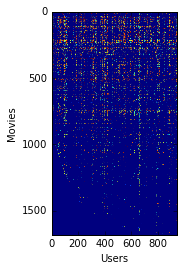

In [6]:
## =============== Part 1: Loading movie ratings dataset ================
# 영화 평점 데이터셋을 로드하고 데이터의 구조를 이해한다.

print('Loading movie ratings dataset.')

# 데이터를 로드한다.
mat_content = sio.loadmat('ex8_movies.mat')
Y = mat_content['Y']
R = mat_content['R']

# Y 는 1682x943 행렬인데, 943명의 사용자가 1682개의 영화에 대한
# 평점 (1-5)를 포함하고 있다.

# R은 1682x943 행렬인데, R(i, j) = 1 인 경우에 사용자 j가 영화 i에
# 평점을 주었다는 의미이다.

#print(Y[0, find(R[0, :] > 0)])
#print(R[0, :])

# 행렬에서, 우리는 평균 평점과 같은 통계치를 계산할 수 있다.
print('Average rating for movie 1 (Toy Story): %f / 5' % mean(Y[0, find(R[0, :] > 0)]))
"""
In Octave/MATLAB:

Average rating for movie 1 (Toy Story): 3.878319 / 5
"""
print()

# 우리는 imagesc를 사용해서 평점 행렬을 "가시화" 할 수 있다.
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')

### 2.2 Collaborative filtering learning algorithm

이제, 협업 필터링 알고리즘을 구현하게 된다. **먼저 (regularization 이 없는) cost function으로 시작한다.**

영화 추천 셋팅에서의 협업 필터링 알고리즘은 n-차원 파라미터 벡터 x^(1),,, x^(nm) 과 theta^(1),,, theta^(nu) 의 집합으로 생각할 수 있는데, 여기서 **모델은 영화 i에 대해서 사용자 j의 평점을 예측한다.** y^(i, j) = (theta^(j))Tx^(i). 

주어진 데이터텟은 몇몇 사용자들이 몇몇 영화에 대한 평점의 집합으로 구성된다. 당신은 파라미터 벡터 x^(1),,, x^(nm), theta^(1),,,theta^(nu) 를 학습해서 best fit을 만들고 싶을 것이다. (오차 제곱을 최소화하는)

당신은 cofiCostFunc.m내의 코드를 완성해서 협업 필터링에 대한 cost function 과 gradient를 계산해야 한다. 함수에 대한 파라미터들은(즉, 학습하고자 하는 값들) X와 Theta가 됨을 주목하자. **fmincg와 같은 이미 만들어진 최소화 함수를 사용하기 위해서, cost function은 파라미터를 단일 벡터 params로 unroll 했다.** 당신은 이전에 neural networks에서 동일한 벡터 unrolling 기법을 사용했다.


#### 2.2.1 Collaborative filtering cost function

협업 필터링 cost function (regularization 없이) 는 다음처럼 주어진다.


당신은 cofiCostFunc.m 을 수정해서 변수 J에 이 cost를 반환해야 한다. **당신은 사용자 j와 영화 i 가 R(i, j) = 1 일 경우에만 cost를 누적해야 함을 주목하라.**

일단 함수를 완료한 이후에, 스크립트 ex8_cofi.m은 당신의 cost function을 실행할 것이다. 출력값 22.22 를 보아야 한다.

Implementation Note: 우리는 J를 계산하기 위해 벡터화된 구현을 사용할 것을 강력히 권장한다. 왜냐하면 나중에 최적화 패키지인 fmincg에 의해서 많이 호출될 것이기 때문이다. 평상시처럼, non-vector화 구현을 먼저 작성하는 것이 가장 쉬울 수 있고, 그것을 벡터화 구현이 되게끔 수정해야 한다. (벡터화 단계가 당신의 알고리즘 출력을 변경하지 않음을 확인하면서) 

벡터화 구현을 이끌어내기 위해서, 다음 팁이 도움이 될 것이다. 선택된 항목을 0으로 설정하기 위해서 R 행렬을 사용할 수 있다. 예를 들어, R .\* M 은 M과 R 사이에 요소곱을 수행한다; 왜냐하면 R은 단지 0 또는 1의 값만을 가진 요소들이기 때문이다. 이것은 M의 요소를 0으로 설정하는 효과를 가지고 있는데 R 이 0일 경우에 그렇게 된다. 따라서, sum(sum(R .\* M)) 은 M의 모든 요소의 합인데 R 이 1인 요소와 일치할 경우가 된다.

In [7]:
# You should now submit your solutions.

## ============ Part 2: Collaborative Filtering Cost Function ===========
# 이제 협업 필터링에 대한 cost funciton을 구현해야 한다. cost function을 디버깅
# 하는데 도움이 되기 위해서, 우리는 우리가 training한 가중치 집합을 포함시켰다.
# 특히, cofiCostFunc.m 내의 코드를 완성해서 J를 반환해야 한다.

def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, s_lambda):
    """
    혐업 필터링 cost function
    협업 필터링 문제에 대한 cost와 gradient를 반환한다.
    """
    
    # params에서 U와 W 행렬을 unfold 한다.
    X = np.reshape(params[0:num_movies * num_features], (num_movies, num_features))
    Theta = np.reshape(params[num_movies * num_features:], (num_users, num_features))
    
    # 다음 변수를 올바르게 반환해야 한다.
    J = 0
    X_grad = np.zeros((X.shape))
    Theta_grad = np.zeros((Theta.shape))
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 협업 필터링에 대한 cost function과 gradient를 계산해라.
    # 구체적츠로, 먼저 (regularization 없는) cost function을 구현하고 
    # 우리의 costs와 일치하는지 확인해라. 그리고난 후, gradient를 구현하는데
    # checkCostFunction 루틴을 사용해서 gradient가 올바른지 체크해라.
    # 마지막으로 regularization을 구현해야 ㅎ나다.
    
    # Notes: X - num_movies x num_features의 영화 features에 대한 행렬이다.
    # Theta - num_users x num_features의 사용자 features에 대한 행렬이다.
    # Y - num_movies x num_users 행렬인데 영화에 대한 사용자의 평점을 가지고 있다.
    # R - num_movies x num_users 행렬인데, R(i, j) = 1 이라면 j-번째 사용자가
    # i-번째 영화를 평가했다는 의미이다.
    
    # 다음 변수를 올바르게 반환해야 한다.
    # X_grad - num_movies x num_features 행렬, X의 각 요소에 대한 편미분값을 갖는다.
    # Theta_grad - num_users x num_features 행렬, Theta의 각 요소에 대한 편미분값을 갖는다.
    
    # X * Theta'는 예측값이다.
    # R .* Y은 사용자의 평가 점수가 있을 경우(R) 해당 영화에 대한 평가점수 이다. (Y)
    J = 1/2 * sum(sum( ( ( X.dot(Theta.T) - Y) * R )**2))

    # 영화 i번째에 대한 피쳐 x를 상각할 때, 영화를 평가한 사용자들만 생각하면 된다.
    # 방법으로, 영화 i에 대해서 x(i)_1,,,x(i)_n에 대한 모든 피쳐의 미분을 한번에 계산한다.
    # Tehta, Y에서 관심있는 항목만 추출한다. (r(i, j) = 1)
    
    # 모든 영화에 대해서 loop를 실행한다.
    for i in np.arange(num_movies):
        
        # 영화 i를 평가한 사용자의 인덱스 정보를 추출한다.
        idx = find(R[i, :] == 1)
        
        # 인덱스 정로를 이용해서 영화를 평가한 실제 사용자의 theta와 평가점수를 구한다.
        Theta_temp = Theta[idx, :]
        Y_temp = Y[i, idx] # 1x2 dimension
        
        # 영화에 대한 피쳐 2개가 계산된다. X_grad(i, :) = 1x2 dimension
        X_grad[i, :] = (X[i, :].dot(Theta_temp.T) - Y_temp).dot(Theta_temp)
        
        # 2.2.4 reguarlized gradient를 계산한다.
        X_grad[i, :] = X_grad[i, :] + s_lambda * X[i, :]
        
    # 모든 사용자에 대해서 loop를 실행한다.
    for j in np.arange(num_users):
        
        # 사용자 j가 평가한 영화의 인덱스 정보를 추출한다.
        idx = find(R[:, j] == 1) # idx는 몇 번째 영화인지를 나타낸다.
        
        # 인덱스 정보를 이용해서 영화를 평가한 실제 사용자의 theta와 평가점수를 구한다.
        Theta_temp = Theta[j, :]
        Y_temp = Y[idx, j]
        
        X_temp = X[idx, :]
        
        #Theta_grad(j, :) = 1x2 dimension
        Theta_grad[j, :] = (X_temp.dot(Theta_temp.T) - Y_temp).T.dot(X_temp)
        
        # 2.2.4 Regualized gradient를 계산한다.
        Theta_grad[j, :] = Theta_grad[j, :] + s_lambda * Theta[j, :]
        
    # 2.2.3 Regularized cost function 구현
    J = J + (s_lambda / 2) * sum(sum(Theta**2)) + (s_lambda/2) * sum(sum(X**2))
    grad = np.append(X_grad.flatten(), Theta_grad.flatten())
    
    return J, grad

# 미리 학습된 가중치를 로드한다.(X, Theta, num_users, num_movies, num_features)
mat_content = sio.loadmat('ex8_movieParams.mat')
X = mat_content['X']
Theta = mat_content['Theta']
num_users = mat_content['num_users'][0, 0]
num_movies = mat_content['num_movies'][0, 0]
num_features = mat_content['num_features'][0, 0]


# 데이터셋의 크기를 줄여서 더 빠르게 실행되도록 한다.
num_users = 4; num_movies = 5; num_features = 3;
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

# cost function을 평가한다.
J = cofiCostFunc(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, num_movies, \
                num_features, 0)[0]

print('Cost at loaded parameters: %f ' % J)
print('(this value should be about 22.22)')


Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


#### 2.2.2 Collaborative filtering gradient

이제, gradient (regularization 없는) 를 구현해야 한다. 특별히, cofiCostFunc.m 의 코드를 완성해서 변수 X_grad와 Theta_grad를 반환해야 한다. **X_grad는 X와 동일한 크기의 행렬이 되어야 하고 Theta_grad는 Theta와 동일한 크기의 행렬이 되어야 함을 주목해라.**

cost function의 gradients는 다음처럼 주어진다.


함수는 그것들을 단일 벡터로 unrolling함으로써 2개 집합의 변수들에 대한 gradient를 반환하게 된다. gradients를 계산하는 코드를 완성한 이후에, 스크립트 ex8_cofi.m은 gradient check (checkCostFunction)을 실행시켜서 수치적으로 당신의 gradients 구현과 비교할 것이다. **만약 당신의 구현이 올바르다면, analytical 분석적 gradients와 numerical 수치적 gradients가 매우 가깝게 일치해야 한다.**

Implementaion Note: 당신은 이 과제에 대해서 벡터화된 구현없이도 완전한 점수를 얻을 수 있다. 그러나 당신의 코드는 더욱더 느려진다 (수 시간 동안). 그래서 우리는 당신의 구현을 벡터화할 것을 권장한다.

시작하기 위해서, 당신은 영화에 대한 for-loop를 가진 gradient를 구현할 수 있다. (미분 계산) 그리고 사용자에 대해서도 for-loop를 가진 gradient를 구현할 수 있다. 처음 gradient를 구현할 때, 벡터화되지 않은 버전으로 시작할 수 있다. 다른 inner for-loop를 구현하는데 그것은 각각의 요소를 합하게 된다. gradient 계산을 이와 같이 완성하게 되면, 당신의 벡터화된 구현을 시도할 차례다. (inner for-loops를 벡터화 한다.) 그래서 단지 2개의 for-loops만 남겨 놓게 된다. (하나는 각 영화에 대한 비분값을 계산하기 위해서 영화에 대해 looping을 사용하는 것이고, 다른 하나는 각 사용자에 대한 미분을 계산하기 위해서 사용자에 대해 looping을 사용하는 것이다.)


In [8]:
# You should now submit your solutions.

## ============== Part 3: Collaborative Filtering Gradient ==============
# 일단 cost function이 우리 것과 일치한다면, 이제 협업 필터링 gradient funciton을
# 구현해야 한다. 특히, cofiCostFunc.m내의 코드를 완성해서 grad 인자를 반환해야 한다.

# ex4에서 가져옴
def computeNumericalGradient(J, theta):
    """
    "finite differences" 방법으로 gradient를 계산하고 gradient의 수치적 근사값을 제공한다.
    numgrad = COMPUTENUMERICALGRADIENT(J, theta) 는 theta 주변에서 함수 J 의 numerical gradient를 계산한다.
    y = J(theta)는 theta에서의 함수 값을 반환해야 한다.
    
    Notes: 다음의 코드는 numerical gradient 체킹을 구현하고, numerical gradient를 반환한다.
        numgrad(i)를 (수치적으로 근사치인) J의 편미분 값으로 설정하는데, J는 theta 에서 평가된 i번째 입력 인자와
        관련이 있다. (즉, numgrad(i) 는 (근사적으로) theta(i)에 대해서 J의 편미분 값이 된다.)
    """
    size_theta = np.size(theta)
    
    numgrad = np.zeros(size_theta)
    perturb = np.zeros(size_theta)
    e = 1e-4
    
    # for p = 1:numel(theta)
    for p in np.arange(size_theta): 
        # Set perturbation vector
        perturb[p] = e
        
        # J가 cost, gradients를 반환하기 때문에 grad를 추가로 붙였다.
        loss1, grad = J(theta - perturb)
        loss2, grad = J(theta + perturb)
        
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)
        perturb[p] = 0
 
    return numgrad

def checkCostFunction(s_lambda = 0):
    """
    협업 필터링 문제를 생성해서 당신의 cost function과 gradients를 체크한다.
    그것은 당신의 코드에 의한 분석적 gradients 와 (computeNumericalGradient를 사용해서
    계산된) 수치적 gradients를 생성한다.
    이들 2개의 gradients 계산은 매우 유사한 값이어야 한다.
    """
    
    # lambda를 설정한다.
    
    # 작은 문제를 생성한다.
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5, 3)
    
    # 대부분의 항목을 zap out한다.
    Y = X_t.dot(Theta_t.T)
    # Y 전체 요소만큼 랜덤 수를 생성하고 0.5 보다 큰지 작은지에 대한 True/False를 
    # 만들어서 Y크기대로 reshape한다.
    Y[(rand(np.size(Y)) > 0.5).reshape(Y.shape)] = 0
    R = np.zeros(Y.shape)
    R[Y != 0] = 1; # XXX: Y ~= 0 <=> Y != 0
    
    # Gradient Checking을 실행한다.
    X = np.random.randn(np.size(X_t))
    Theta = np.random.randn(np.size(Theta_t))
    num_users = Y.shape[1] # 5
    num_movies = Y.shape[0] # 4
    num_features = Theta_t.shape[1] # 3
    
    costFunc = lambda p: cofiCostFunc(p, Y, R, num_users, num_movies, num_features, s_lambda)
    
    numgrad = computeNumericalGradient(costFunc, np.append(X.flatten(), Theta.flatten()))
    
    cost, grad = cofiCostFunc(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, \
                             num_movies, num_features, s_lambda)
    
    print(np.array([numgrad, grad]).T)
    print('The above two columns you get should be very similar.')
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)')
    
    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print('If your backpropagation implementation is correct, then ')
    print('the relative difference will be small (less than 1e-9).')
    print('Relative Difference: %g' % diff)
    


print('checking Gradients (without regularization) ... ')

# checkNNGradients를 수행해서 gradients를 체크한다.
checkCostFunction()


checking Gradients (without regularization) ... 
[[ -6.39894187e-01  -6.39894187e-01]
 [  1.03940750e-02   1.03940750e-02]
 [ -5.69568858e-02  -5.69568858e-02]
 [ -1.77473656e+00  -1.77473656e+00]
 [  6.00639226e+00   6.00639226e+00]
 [ -6.75407619e-02  -6.75407619e-02]
 [ -2.58414989e-02  -2.58414989e-02]
 [ -7.19143847e-02  -7.19143847e-02]
 [ -4.02327133e-02  -4.02327133e-02]
 [  4.22410458e-01   4.22410458e-01]
 [  8.60520173e+00   8.60520173e+00]
 [  5.72699979e-01   5.72699979e-01]
 [  1.20841369e+00   1.20841369e+00]
 [ -1.48209079e+00  -1.48209079e+00]
 [  1.95461623e+00   1.95461623e+00]
 [  1.83648203e+00   1.83648203e+00]
 [ -2.33532350e+00  -2.33532350e+00]
 [  3.05617720e+00   3.05617720e+00]
 [ -2.10637834e-01  -2.10637834e-01]
 [  1.00689110e-01   1.00689110e-01]
 [ -2.56869634e-01  -2.56869634e-01]
 [ -1.85084833e-01  -1.85084833e-01]
 [  1.31265757e+00   1.31265757e+00]
 [  1.24528055e+00   1.24528055e+00]
 [  4.38422213e+00   4.38422213e+00]
 [ -1.24288460e+01  -1.242

Implementation Tip: 벡터화를 수행하기 위해서, 이것이 도움이 될 것이다. x_1^(i), x_2^(i),,,X_n^(i) 와 관련된 모든 미분을 동시에 계산하는 방법을 만들어야 한다. (즉, feature vector x^(i)에 관련된 미분 항목)

i-번째 영황에 대한 feature vector를 위해서 미분을 정의해보자.


위의 표현을 벡터화하기 위해서, Theta와 Y를 인덱싱하면서 시작하고 관심있는 요소만을 선택할 수 있다. (즉, r(i, j) = 1 인 것들). 직관적으로, i-번째 영황에 대한 feature를 고려할 때, 당신은 그 영화에 평점을 주었던 사용자들만 관심을 가질 필요가 있다. 그리고 이렇게 하는 것은 Theta와 Y에서 모든 다른 사용자를 제거하게 해준다.

구체적으로, 당신은 idx = find(R(i, :) == 1)을 설정함으로써 영화 i에 평점을 매긴 모든 사용자 목록을 구하게 된다. 이것은 임시 행렬 Theta_temp = Theta(idx, :) 와 Y_temp = Y(i, idx)를 만들도록 하는데 Theta와 Y에 대한 인덱스는 i-번째 영화를 평가한 사용자의 집합만을 제공하게 해준다. 이것은 미분을 다음과 같이 쓸 수 있게 해준다.


(Note: 위의 벡터화된 계산은 행-벡터를 대신 반환한다.)

**x^(i)와 연관된 미분의 계산을 벡터화 한 이후에는 유사한 방법을 사용해서 theta^(j)와 관련된 미분도 또한 벡터화 해야 한다.**

#### 2.2.3 Regularized cost function

regularization을 가진 협업 필터링에 대한 cost function은 다음처럼 주어진다.


당신은 이제 cost function, J의 원래 계산에 regularization을 추가해야 한다. 이것을 완료한 후에, 스크립트 ex8_cofi.m은 regularized cost function을 실행하는데, cost는 약 31.34가 됨을 볼 수 있다.

In [9]:
# You should now submit your solutions.

## ========= Part 4: Collaborative Filtering Cost Regularization ========
# 이제, 협업 필터링에 대한 cost funciton의 regularization을 구현해야 한다. 
# regularization 비용을 원래 cost 계산에 추가함으로서 구현할 수 있다.

# cost function 평가하기
J = cofiCostFunc(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, num_movies, \
                num_features, 1.5)[0]

print('Cost at loaded parameters (lambda = 1.5): %f' % J)
print('(this value should be about 31.34)')

Cost at loaded parameters (lambda = 1.5): 31.344056
(this value should be about 31.34)


#### 2.2.4 Regularized gradient

이제 regularized cost function을 구현하게 되었다. gradient에 대한 regularization을 구현하기 위해 계속 진행해야 한다. cofiCostFunc.m의 구현에 regularized gradient를 반환하는 코드를 추가해야 하는데, regularization terms에서 contributions를 추가한다.

regularized cost function에 대한 gradients는 다음과 같이 주어진다.



이것은 당신이 lambdax^(i)를 이전에 설명된 X_grad(i, :) 변수에 추가해야 함을 의미한다. 그리고 lambda * theta^(j)를 이전에 설명된 Theta_grad(j, :) 변수에 추가해야 한다.

gradients를 계산하는 코드를 완성한 이후에, 스크립트 ex8_cofi.m은 다른 gradient check (checkCostFunction)을 실행시키는데 numerically 수치적으로 당신의 gradients 구현을 체크하게 된다.


In [10]:
# You should now submit your solutions.

## ======= Part 5: Collaborative Filtering Gradient Regularization ======
# 일단 cost가 우리 것과 일치한다면, gradient에 대한 regularization을 구현하도록 한다.

print('Checking Gradients (with regularization) ... ')

# checkNNGradients를 실행해서 gradients를 체크한다.
checkCostFunction(1.5)


Checking Gradients (with regularization) ... 
[[ 3.66652996  3.66652996]
 [-1.13897224 -1.13897224]
 [-3.30563068 -3.30563068]
 [ 2.83025255  2.83025255]
 [ 0.32551778  0.32551778]
 [ 4.95824893  4.95824893]
 [-3.07233339 -3.07233339]
 [ 1.49695911  1.49695911]
 [-1.08522195 -1.08522195]
 [ 1.38261702  1.38261702]
 [-3.71374191 -3.71374191]
 [-1.34093585 -1.34093585]
 [-0.95069724 -0.95069724]
 [ 2.96960775  2.96960775]
 [ 0.72094331  0.72094331]
 [-0.43512393 -0.43512393]
 [-1.83706301 -1.83706301]
 [ 0.21382442  0.21382442]
 [ 2.37035848  2.37035848]
 [-1.61807778 -1.61807778]
 [ 0.55572831  0.55572831]
 [ 1.73543697  1.73543697]
 [ 1.32345283  1.32345283]
 [ 5.01267109  5.01267109]
 [-1.45639594 -1.45639594]
 [ 1.92510922  1.92510922]
 [-0.43454425 -0.43454425]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)
If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9).

### 2.3 Learning movie recommendations

협업 필터링의 cost function과 gradients를 구현한 이후에, 당신의 알고리즘을 훈련시켜서 스스로 영화 추천에 사용할 수 있게 된다. ex_cofi.m 스크립트의 다음 부분에서는, 당신 자신의 영화 선호도를 입력하고, 그래서 알고리즘이 실행되고 난 후에, 당신 자신의 영화 추천을 얻을 수 있게 된다. 우리는 우리의 선호도에 따라 몇몇 값을 채워 놓았다. 하지만 당신 취향에 따라 이것을 변경할 수 있다. 모든 영화 목록과 번호는 파일 movie_idx.txt 파일에 목록으로 있다.


#### 2.3.1 Recommendations

Figure 4: Movie recommendations

부가적인 평가가 데이터셋에 추가되고 난 후에, 스크립트는 협업 필터링 모델을 훈련할 것이다. 이것은 파리미터 X와 Theta를 학습하게 된다. 사용자 j에 대해서 영화 i에 대한 평점을 예측하기 위해, (theta^(j))Tx^(i)를 계산할 필요가 있다. 

스크립트의 다음 부분에서 모든 사용자와 영화에 대한 평점을 계산하고 추천된 영화를 표시한다. 스크립트 내에 이전에 입력된 평점에 따라서...

**서로 다른 예측 집합을 얻을 수도 있는데 서로 다른 무작위 초기화 때문에 그렇다.**


In [29]:
## ============== Part 6: Entering ratings for a new user ===============
# 우리가 협업 필터링 모델을 훈련시키기 전에, 우리는 먼저 우리가 관측한 새로운 
# 사용자에 대한 평가 점수를 추가해야 한다. 코드의 이 부분은 또한 우리 데이터넷 내에
# 있는 영화에 대해서 당신 자신의 평점을 넣을 수 있도록 해주기도 한다!

def loadMovieList():
    """
    movie.txt내의 고정된 영화 목록을 읽는다. 그리고 단어의 cell array로 반환한다.
    """
    
    # 고정된 영화 목록을 읽는다.
    
    
    # 모든 영화를 cell array인 movie{}에 저장한다.
    n = 1682
    
    """
    In Octave/MATLAB:
    
    movieList = 
    {
      [1,1] = Toy Story (1995)
      [2,1] = GoldenEye (1995)
      [3,1] = Four Rooms (1995)
      [4,1] = Get Shorty (1995)
      [5,1] = Copycat (1995)
      
    movie_ids.txt
    1 Toy Story (1995)
    2 GoldenEye (1995)
    3 Four Rooms (1995)
    4 Get Shorty (1995)
    5 Copycat (1995)
    """
    
    
    filename = 'movie_ids.txt'
    movieList = {} # python dictionary 객체로 선언
    
    try:
        # 고정된 단어 목록 읽기
        # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 읽기 오류 발생
        # encoding='latin-1' 사용함
        fid = open(filename, 'r', encoding='latin-1')
        for line in fid:
            arr_line = line.strip().split(' ')
            # idx: 영화 고유 인덱스, movieName: 영화이름
            idx = arr_line[0]
            movieName = " ".join(arr_line[1:]) # ' '으로 리스트내의 문자열 합치기
            movieList[idx] = movieName
        fid.close()
    except FileNotFoundError:
        print('Unable to open %s' % filename)
        
    return movieList


movieList = loadMovieList()

# 나의 평가 점수를 초기화한다.
my_ratings = np.zeros(1682)

# 우리의 데이터셋 내의 각 영화에 대한 id를 위해 movie_idx.txt 파일을 체크하라.
# 예를 들어, Toy Story (1995)는 ID 1번이고, 그것에 대해 "4"를 평가했다면,
my_ratings[0] = 4 # Octave는 1부터 시작하니까, python 표기 시 0으로 한다.

# 또는 Silence of the Lambs (1991)을 즐기지 않았다면,
my_ratings[97] = 2

# 우리는 우리가 좋아하거나 싫어하는 몇몇 영화들을 선택해서 다음과 같이
# 평점을 주었다.
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print('New user ratings:')
for i in np.arange(np.size(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s' % (my_ratings[i], movieList[str(i + 1)]))

"""
In Octave/MATLAB: 
New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)
"""
print()

New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)



In [14]:
## ================== Part 7: Learning Movie Ratings ====================
# 이제, 943명의 사용자와 1682개의 영화에 대한 평가 데이터셋상에서 협업 필터링
# 훈련을 하게 될 것이다.

def normalizeRatings(Y, R):
    """
    각 영화(매 행마다)에 대해서 평균 점수를 빼는 사전처리 한다.
    Y를 정규화 해서, 각 영화는 평균 0의 평점을 가지고 있고 Ymean으로
    평균 평점을 반환한다.
    """
    
    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)
    
    for i in np.arange(m):
        idx = find(R[i, :] == 1)
        Ymean[i] = mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]
        
    return Ynorm, Ymean

print('Training collaborative filtering...')

# 데이터를 로드한다.
mat_content = sio.loadmat('ex8_movies.mat')
Y = mat_content['Y']
R = mat_content['R']

# Y는 1682x942 행렬이고, 943명의 사용자에 의해 1682개 영황에 대한 평가점수
# (1-5)를 포함하고 있다.

# R은 1682x942 행렬이고, R(i, j) = 1 은 사용자 j가 영화 i에 평가를 했다는 의미이다.

# 데이터 행렬에 당신의 평가점수를 추가한다.
Y = np.column_stack((my_ratings, Y))
R = np.column_stack(((my_ratings != 0), R))

# 평가점수를 정규화 한다.
Ynorm, Ymean = normalizeRatings(Y, R)

# 유용한 값들
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# 초기 파라미터를 설정한다 (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.append(X.flatten(), Theta.flatten())

# fmincg에 대한 옵션을 설정한다.
import scipy.optimize as op

# Regularization을 설정한다.
s_lambda = 10
costFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, \
                                 num_features, s_lambda)[0]
gradFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, \
                                 num_features, s_lambda)[1]

maxiter = 100
Result = op.minimize(fun = costFunc, x0 = initial_parameters, \
                     method = 'CG', jac = gradFunc, options = {'disp': False, 'maxiter': maxiter});
# theta: 26260x1
theta = Result.x
print('cost = %s' % Result.fun)

# 반환된 theta를 U와 W로 unfold한다.
# X: 1682x10
# Theta: 944x10
X = np.reshape(theta[0:num_movies*num_features], (num_movies, num_features))
Theta = np.reshape(theta[num_movies*num_features:], (num_users, num_features))

# TODO: Octave와 python 출력값이 서로 다르다. 이유는?
print(theta[0:5])

print('Recommender system learning completed.')

"""
In Octave/MATLAB: 

Iteration   100 | Cost: 3.895241e+04
theta =

  -1.3594e-01
  -9.8334e-02
  -1.5726e-01
  -1.4264e-01
  -3.5241e-02
"""
print()

Training collaborative filtering...
cost = 38952.14362325743
[ 0.46157453  1.00233365  0.06209437  0.34149685  0.03774826]
Recommender system learning completed.



In [31]:
## ================== Part 8: Recommendation for you ====================
# 모델을 학습하고 난 후, 이제 예측 행렬을 계산해서 추천을 할 수 있다.

p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean;

movieList = loadMovieList()

# TODO: Octave 추천리스트와 여기 값이 서로 다르다. 이유는?
ix = my_predictions.argsort()[::-1]
print('Top recommendations for you:\n')
for i in np.arange(10):
    j = ix[i]
    print('Predicting rating %.1f for movie %s' % (my_predictions[j], movieList[str(j)]))
    
print('\n\nOriginal ratings provided:\n')
for i in np.arange(np.size(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s' % (my_ratings[i], movieList[str(i+1)]))

"""
In Octave/MATLAB: 

Top recommendations for you:
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)
"""
print()

Top recommendations for you:

Predicting rating 5.0 for movie City of Industry (1997)
Predicting rating 5.0 for movie Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
Predicting rating 5.0 for movie Grosse Fatigue (1994)
Predicting rating 5.0 for movie Margaret's Museum (1995)
Predicting rating 5.0 for movie Temptress Moon (Feng Yue) (1996)
Predicting rating 5.0 for movie Celluloid Closet, The (1995)
Predicting rating 5.0 for movie Kim (1950)
Predicting rating 5.0 for movie Simple Wish, A (1997)
Predicting rating 5.0 for movie Young Guns II (1990)
Predicting rating 5.0 for movie Enfer, L' (1994)


Original ratings provided:

Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)


## The End